In [1]:
from pathlib import Path

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sci
from matplotlib.ticker import MultipleLocator
import matplotlib.transforms as mtransforms
import string

from ak_diseq.glacierData import glacierData
from ak_diseq.utils import hist2, weighted_quantile

plt.style.use('default')

In [2]:
gd = glacierData()
gd.calc_response_time()
gd.calc_linear_feq()
d = gd.rgi

[Text(0, -0.05, '−0.05'), Text(0, 0.0, ''), Text(0, 0.05, '0.05'), Text(0, 0.10000000000000002, '0.10'), Text(0, 0.15000000000000002, '0.15'), Text(0, 0.2, '0.20'), Text(0, 0.25000000000000006, '0.25')]
[Text(0, -0.2, '−0.2'), Text(0, 0.0, ''), Text(0, 0.2, '0.2'), Text(0, 0.4000000000000001, '0.4'), Text(0, 0.6000000000000001, '0.6'), Text(0, 0.8, '0.8'), Text(0, 1.0000000000000002, '1.0'), Text(0, 1.2000000000000002, '1.2')]


/var/folders/bb/wssqxcxj4tgg0s9fdw74731m0000gn/T/ipykernel_52150/3512593721.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_yticklabels(labels)
/var/folders/bb/wssqxcxj4tgg0s9fdw74731m0000gn/T/ipykernel_52150/3512593721.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_yticklabels(labels)


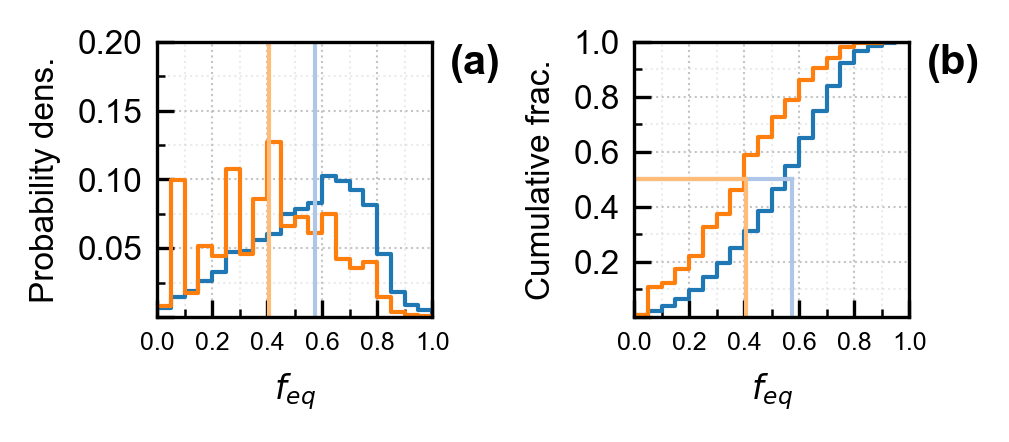

In [3]:
XXSMALL_SIZE = 6
XSMALL_SIZE = 8
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)  # contr
plt.rc('font', family="sans-serif")  # controls default font face
plt.rcParams["font.sans-serif"] = ['Arial']
plt.rc('axes', titlesize=XSMALL_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=XSMALL_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=XSMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=XSMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("axes", grid=True)
plt.rc('axes.grid', which="both", axis='both')
plt.rc('grid', linestyle=':', lw=0.5, alpha=0.75)
plt.rc("lines", lw=1)



fig, ax = plt.subplots(1, 2, figsize=(3.25, 1.55), sharex=True, dpi=300, layout='constrained')


x = d['feq'].dropna()
idx = x.index
x = x.to_numpy()
area = d.loc[idx, 'Area'].to_numpy()
binfreq = 0.05
uwcdf, bins = hist2(x, binfreq=binfreq, cumsum=True, from_zero=True)
awcdf, bins = hist2(x, area=area, binfreq=binfreq, cumsum=True, from_zero=True)
uwpdf, bins = hist2(x, binfreq=binfreq, cumsum=False, from_zero=True)
awpdf, bins = hist2(x, area=area, binfreq=binfreq, cumsum=False, from_zero=True)
ax[1].step(bins, uwcdf)
ax[1].step(bins, awcdf)
ax[0].step(bins, uwpdf)
ax[0].step(bins, awpdf)

# median lines
uwxmax = np.median(x)
awxmax = weighted_quantile(x, [0.5], sample_weight=area)[0]
ax[1].plot([uwxmax, uwxmax], [0, 0.5], ls='-', c=plt.cm.tab20(1), lw=1)
ax[1].plot([awxmax, awxmax], [0, 0.5], ls='-', c=plt.cm.tab20(3), lw=1)
ax[0].axvline(awxmax, ls='-', c=plt.cm.tab20(3), lw=1)
ax[0].axvline(uwxmax, ls='-', c=plt.cm.tab20(1), lw=1)

ax[1].plot([0, uwxmax], [0.5, 0.5], lw=1, c=plt.cm.tab20(1))
ax[1].plot([0, awxmax], [0.5, 0.5], lw=1, c=plt.cm.tab20(3))


for axis in ax.ravel():
    axis.xaxis.set_major_locator(MultipleLocator(0.2))
    axis.xaxis.set_minor_locator(MultipleLocator(0.1))
    axis.grid(which='minor', axis='both', alpha=0.25)
    axis.set_axisbelow(True)    
    axis.tick_params(axis="both", which='both', direction="in", left="off", labelleft="on", length=2, labelsize=XSMALL_SIZE)
    axis.tick_params(axis='both', which='major', length=4)
    axis.tick_params(axis="x", labelsize=XXSMALL_SIZE)
    axis.set_box_aspect(1)
    axis.set_xlabel('$f_{eq}$', fontsize=XSMALL_SIZE)
ax[1].set_ylim([0, 1])
ax[1].set_xlim(0, 1)
ax[1].yaxis.set_major_locator(MultipleLocator(0.2))
ax[1].yaxis.set_minor_locator(MultipleLocator(0.1))
ax[0].set_ylim([0, 0.2])
ax[0].yaxis.set_major_locator(MultipleLocator(0.05))
ax[0].yaxis.set_minor_locator(MultipleLocator(0.025))

ax[0].set_ylabel('Probability dens.', fontsize=XSMALL_SIZE)
ax[1].set_ylabel('Cumulative frac.', fontsize=XSMALL_SIZE)

# label subplots
sp_labels = ['(' + letter + ')' for letter in string.ascii_lowercase]
for i, axis in enumerate(ax):
    # label physical distance in and down:
    trans = mpl.transforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    axis.text(0.9125, 1.07, sp_labels[i], transform=axis.transAxes + trans,
              verticalalignment='top', fontsize=SMALL_SIZE, fontweight='bold')    
# Important to render initial ytick labels
fig.canvas.draw()
    
for axis in ax:
    labels = [item for item in axis.get_yticklabels()]
    labels[1].set_text('')
    print(labels)
    axis.set_yticklabels(labels)

plt.savefig(Path('Fig7.svg'), bbox_inches='tight')
plt.savefig(Path('Fig7.png'), bbox_inches='tight')
plt.savefig(Path('Fig7.pdf'),bbox_inches='tight')